In [155]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import plotly
import plotly.figure_factory as ff


# Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

# data preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
le =LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


In [156]:
# Default theme
sns.set_theme(palette='tab10',font='Arial',font_scale=1.0)
plt.rcParams.update({'font.size':10})
plt.style.use('dark_background')

In [157]:
# load dataset 
df = pd.read_csv('datasets/loan_prediction.csv')

In [158]:
df.sample(10).style.background_gradient(cmap='coolwarm')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
305,LP001990,Male,No,0,Not Graduate,No,2000,0.000000,nan,360.000000,1.000000,Urban,N
421,LP002357,Female,No,0,Not Graduate,No,2720,0.000000,80.000000,nan,0.000000,Urban,N
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.000000,nan,360.000000,1.000000,Urban,Y
435,LP002393,Female,nan,nan,Graduate,No,10047,0.000000,nan,240.000000,1.000000,Semiurban,Y
222,LP001744,Male,No,0,Graduate,No,2971,2791.000000,144.000000,360.000000,1.000000,Semiurban,Y
463,LP002489,Female,No,1,Not Graduate,nan,5191,0.000000,132.000000,360.000000,1.000000,Semiurban,Y
224,LP001750,Male,Yes,0,Graduate,No,6250,0.000000,128.000000,360.000000,1.000000,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.000000,260.000000,360.000000,1.000000,Semiurban,N
283,LP001917,Female,No,0,Graduate,No,1811,1666.000000,54.000000,360.000000,1.000000,Urban,Y
507,LP002625,nan,No,0,Graduate,No,3583,0.000000,96.000000,360.000000,1.000000,Urban,N


In [159]:
df.shape

(614, 13)

In [160]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [161]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [162]:
df.describe().style.background_gradient(cmap='ocean')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [163]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Credit_History','Loan_Status']

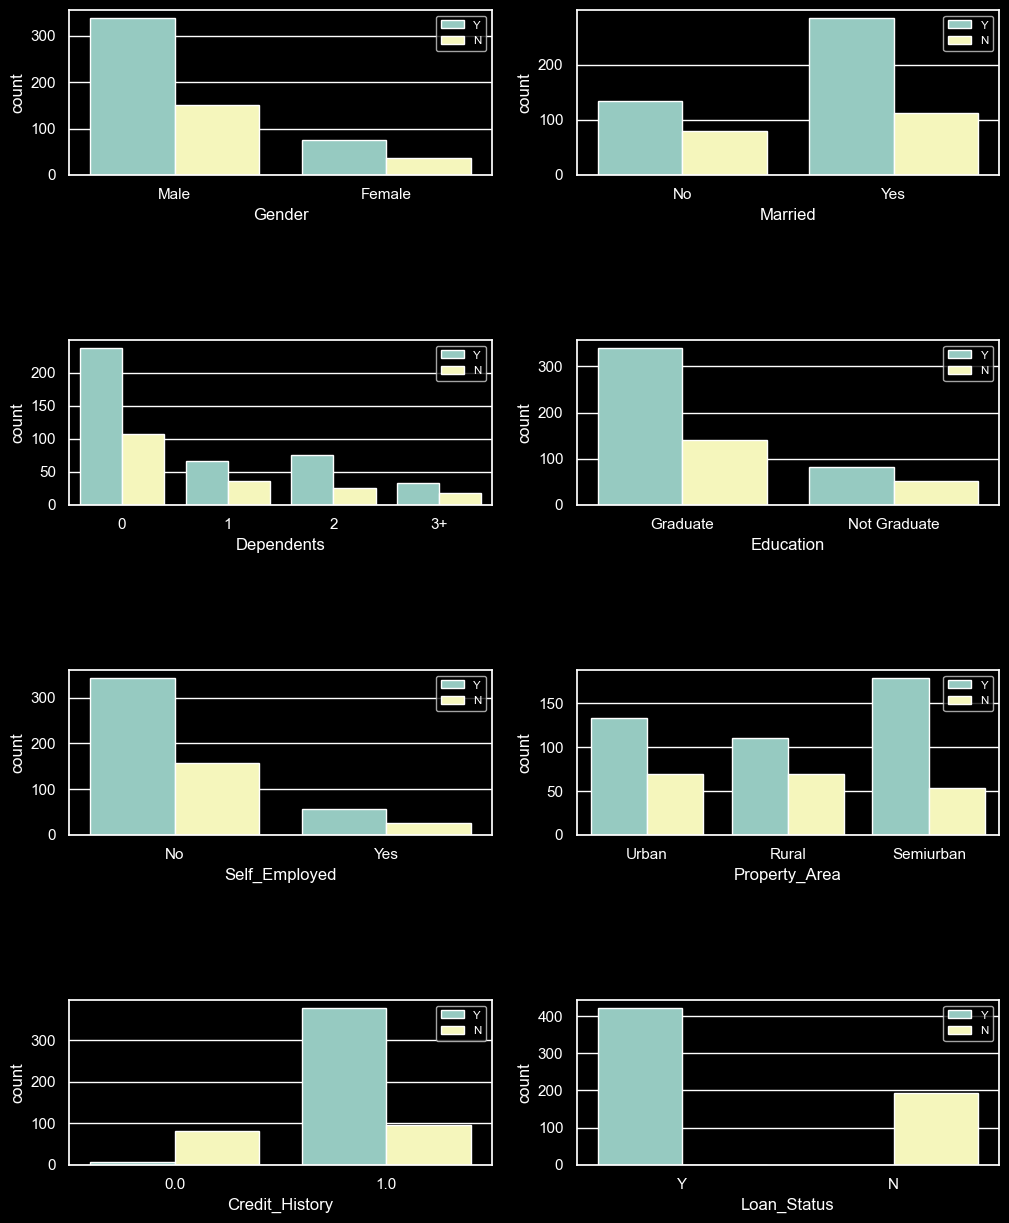

In [164]:
fig,ax =plt.subplots(4,2, figsize=(12,15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx //2, idx % 2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row,col])
    ax[row,col].legend(fontsize='small')
    
plt.subplots_adjust(hspace=1)
plt.show()

In [165]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
numerical_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000         614.000000  592.000000         600.00000
mean       5403.459283        1621.245798  146.412162         342.00000
std        6109.041673        2926.248369   85.587325          65.12041
min         150.000000           0.000000    9.000000          12.00000
25%        2877.500000           0.000000  100.000000         360.00000
50%        3812.500000        1188.500000  128.000000         360.00000
75%        5795.000000        2297.250000  168.000000         360.00000
max       81000.000000       41667.000000  700.000000         480.00000


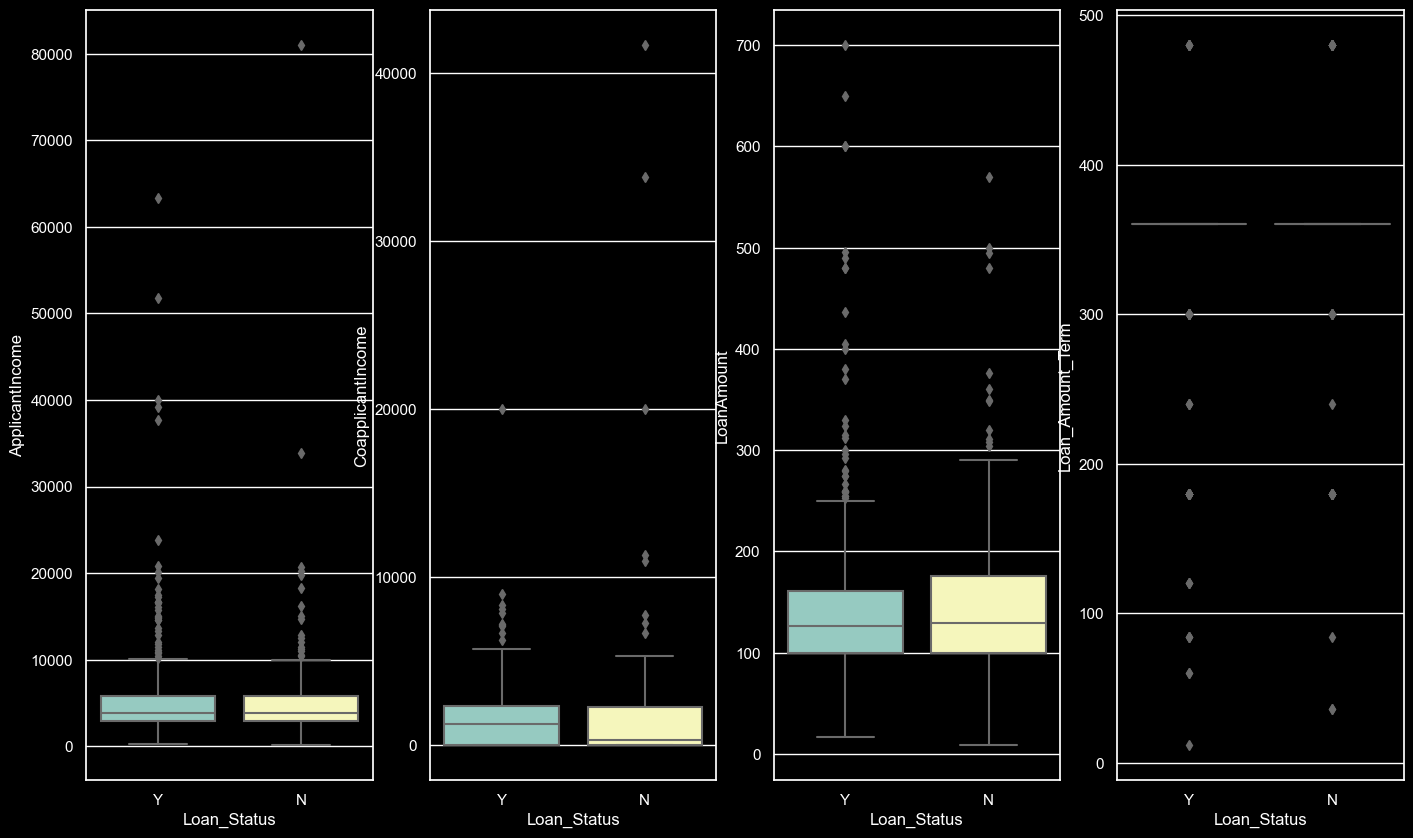

In [166]:
fig, axes = plt.subplots(1,4, figsize=(17,10))
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(y=num_col,data=df, x='Loan_Status', ax=axes[idx])
print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)
plt.show()

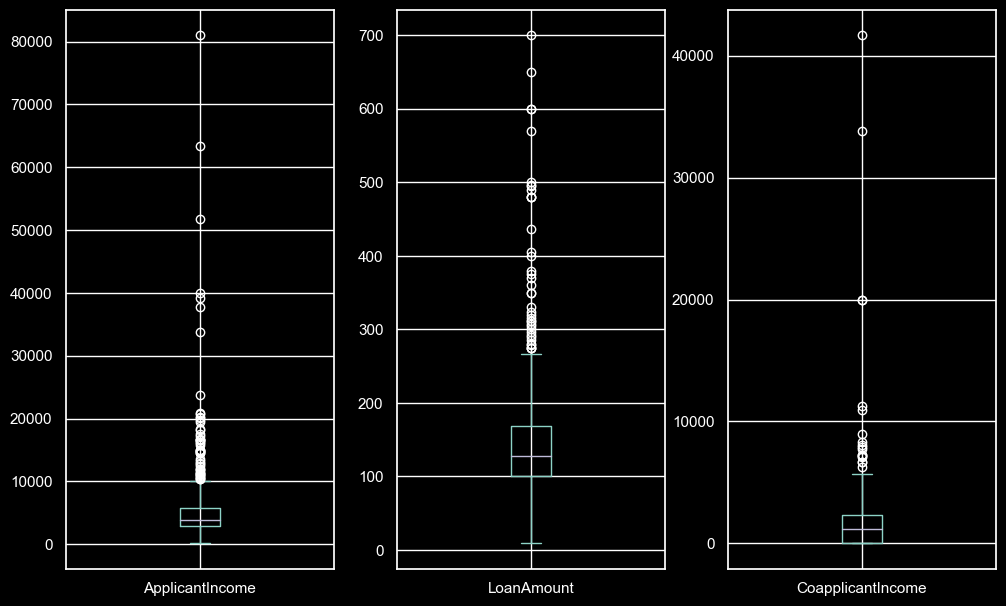

In [167]:
plt.subplot(131)
df['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
df['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
df['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

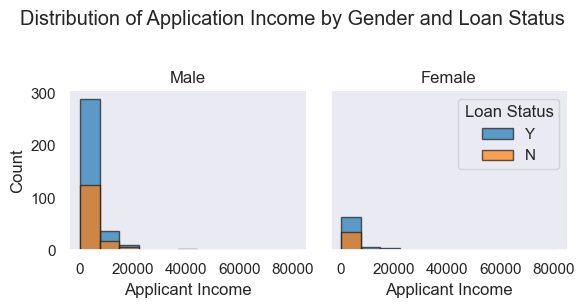

In [168]:
custom_palatte = sns.color_palette('tab10',2)
bins = np.linspace(df['ApplicantIncome'].min(),df['ApplicantIncome'].max(),12)
sns.set(style='dark')
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status",palette=custom_palatte,col_wrap=2)
graph.map(plt.hist,'ApplicantIncome',bins=bins, ec="k",alpha=0.7)
graph.set_titles(col_template="{col_name}")
graph.axes[-1].legend(title='Loan Status', loc='upper right')
graph.set_axis_labels("Applicant Income","Count")
graph.fig.suptitle("Distribution of Application Income by Gender and Loan Status",y=1.02)
plt.tight_layout()
plt.show()


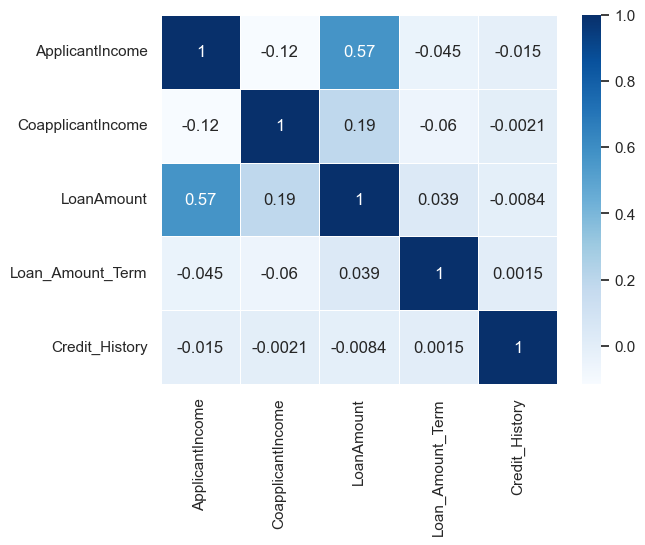

In [169]:
# correlation 
corr = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']].corr()

sns.heatmap(corr,annot=True,linewidths=.5,cmap="Blues")
plt.show()

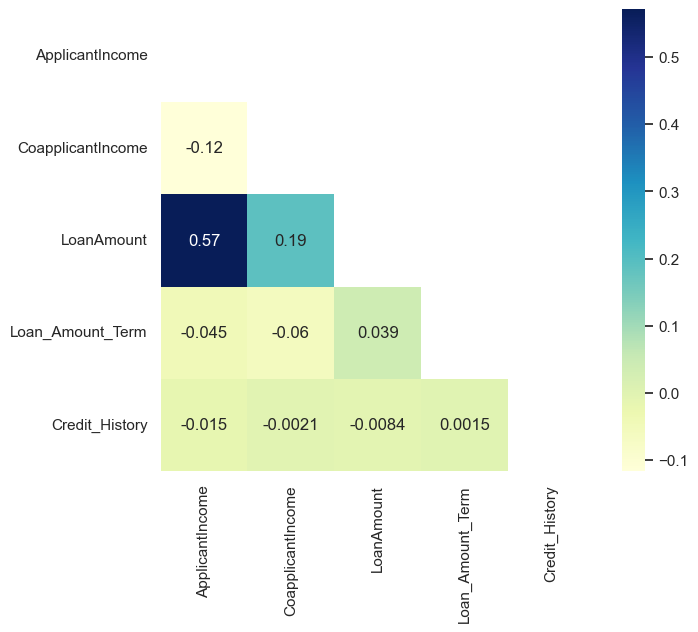

In [170]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax= sns.heatmap(corr,mask=mask, annot=True,cmap="YlGnBu")
    

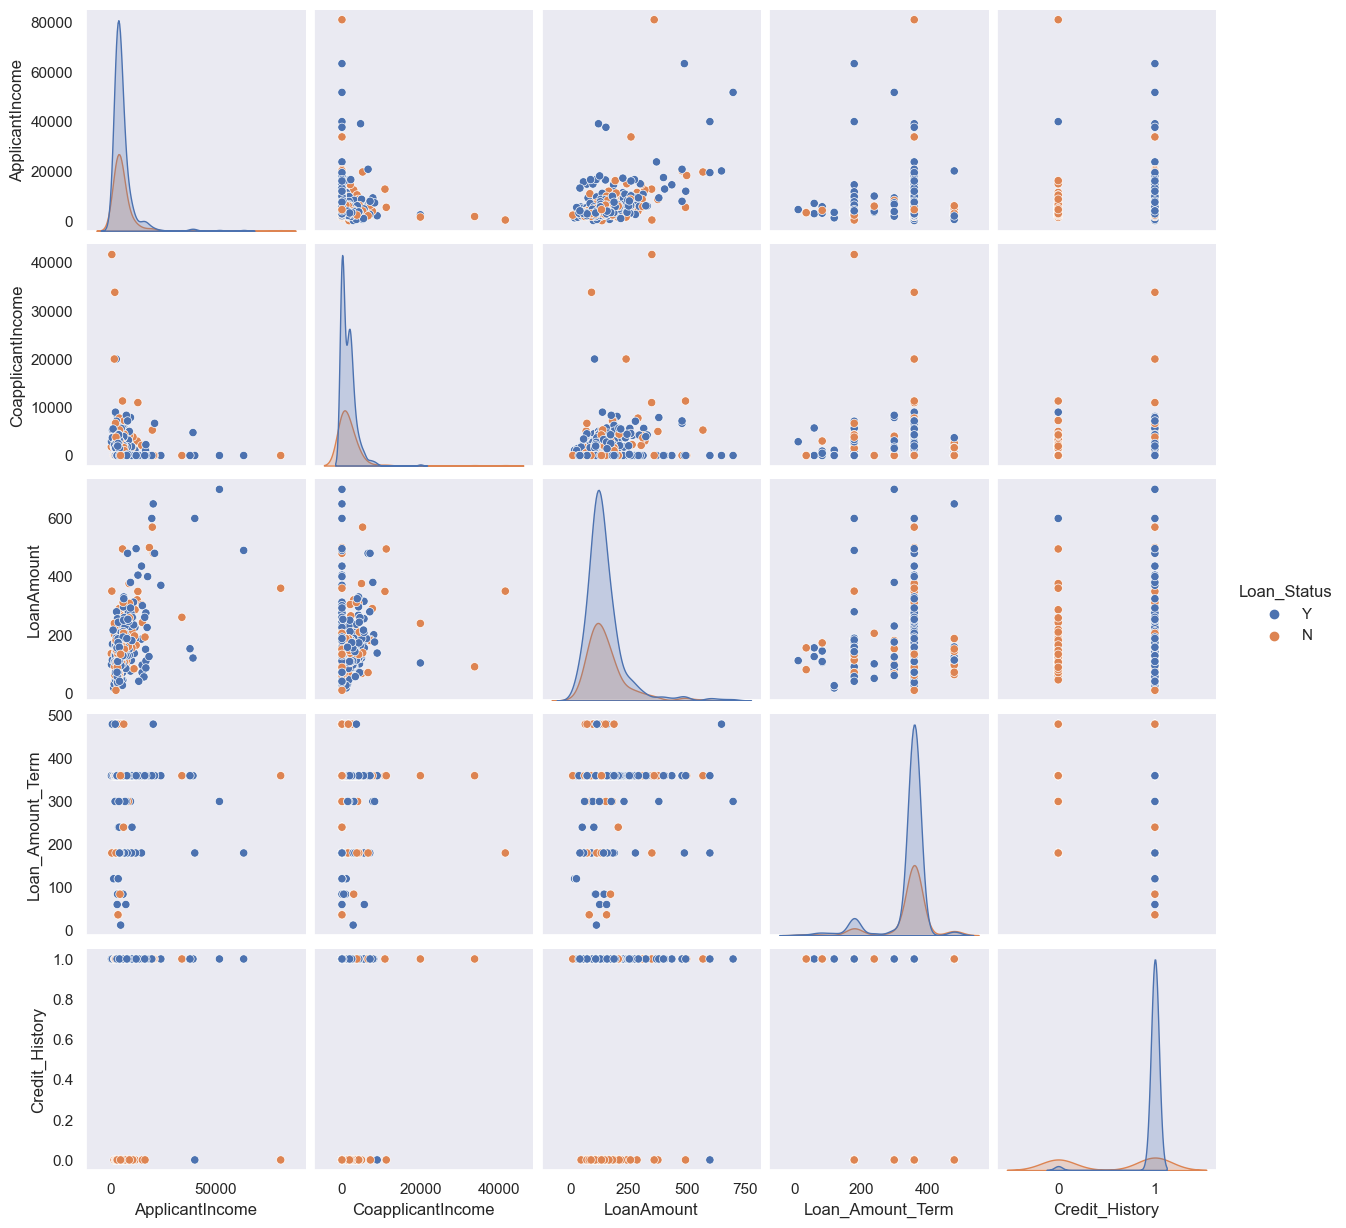

In [171]:
sns.pairplot(df,vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History'],hue="Loan_Status")
plt.show()

In [172]:
# check missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

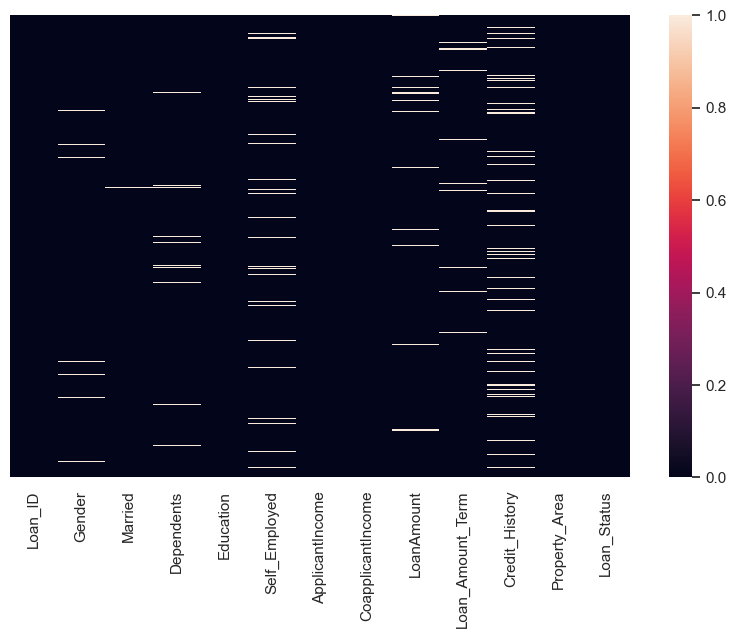

In [173]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

In [174]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [175]:
# Drop Loan_ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

# Treating numerical cols with missing values 
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

#treating categorical cols with missing values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# All values of "Dependents" column are str form, converting to int form
df['Dependents'] = df['Dependents'].replace('3+',int(3))
df['Dependents'] = df['Dependents'].replace('2',int(2))
df['Dependents'] = df['Dependents'].replace('0',int(0))
df['Dependents'] = df['Dependents'].replace('1',int(1))




In [176]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

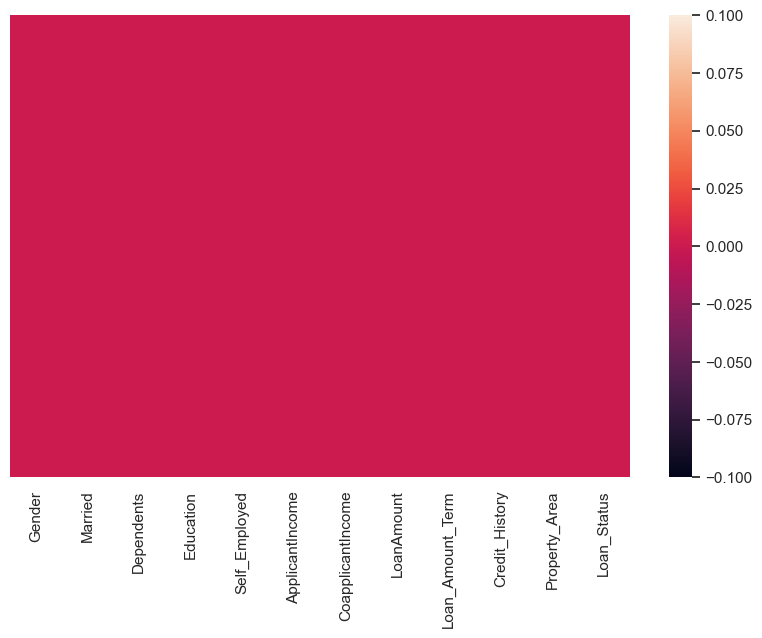

In [177]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

#### Convert categorial to numerical

In [178]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [179]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [180]:
# split the dataset 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [181]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [182]:
# ColumnsTransformer

cat_col = X.select_dtypes(include='object').columns
num_col = X.select_dtypes(exclude='object').columns

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[('cat',onehot,cat_col),('num',scaler,num_col)], remainder='passthrough')

### Split the data into train and test set and preprocess it for modeling

In [183]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [184]:
print(x_train.shape)
print(x_test.shape)

(491, 11)
(123, 11)


In [185]:
print(y_train.shape)
print(y_test.shape)

(491,)
(123,)


In [186]:
## Preprocess the train data
x_train =preprocessor.fit_transform(x_train)
x_test = preprocessor.tr)ansform(x_test)

### Building Model

In [187]:
def evaluate_model(true,predicted):
    acc_score = accuracy_score(true,predicted)
    cls_rep = classification_report(true,predicted)
    return acc_score,cls_rep

In [188]:
models = {
    "Random Forest Classifier":RandomForestClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "SVM": SVC(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoost classifier": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "GausianNB":GaussianNB()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy,class_rep = evaluate_model(y_test,y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance")
    print("-Accuracy {:.4f}".format(accuracy))
    print("- Classification report: ",class_rep)
    
    print('='*36)
    
    accuracy_list.append(accuracy)
    

Random Forest Classifier
Model Performance
-Accuracy 0.7724
- Classification report:                precision    recall  f1-score   support

           0       0.74      0.44      0.55        39
           1       0.78      0.93      0.85        84

    accuracy                           0.77       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.77      0.77      0.75       123

Ridge Classifier
Model Performance
-Accuracy 0.8049
- Classification report:                precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123

SVM
Model Performance
-Accuracy 0.7886
- Classification report:                precision    recall  f1-score   support

           0       0.84      0.41      0.55        39
        